In [84]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Read the training data

In [85]:
df = pd.read_csv('./train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [86]:
# Print the first 5 rows
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# Perform data preprocessing

In [87]:
# Drop duplicate samples
df.drop_duplicates(inplace=True)
# Drop null/empty samples
df.dropna(inplace=True)

# Visualize the data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


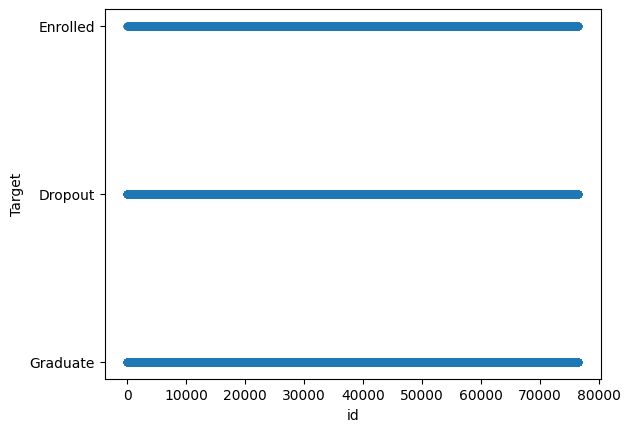

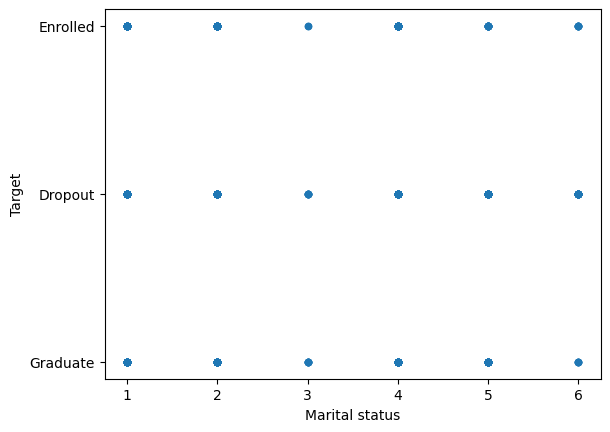

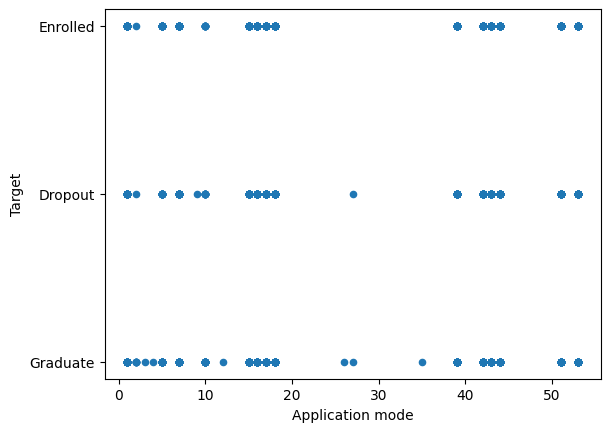

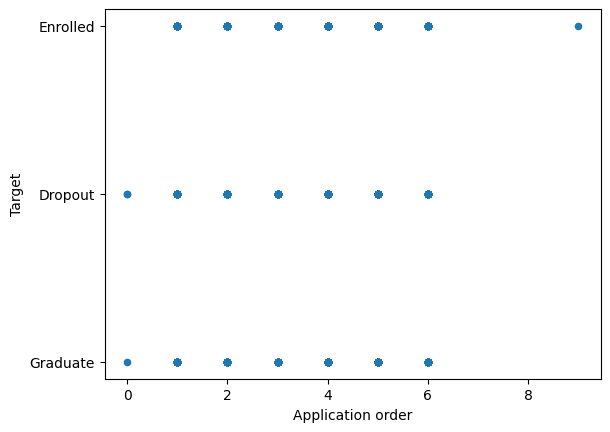

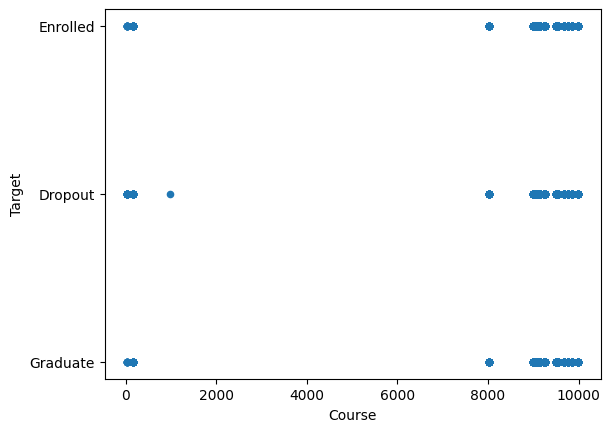

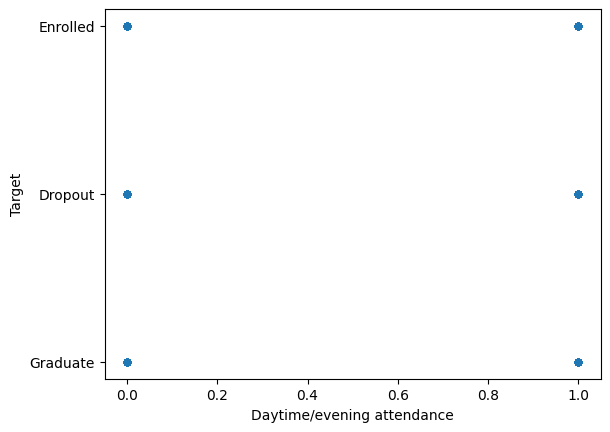

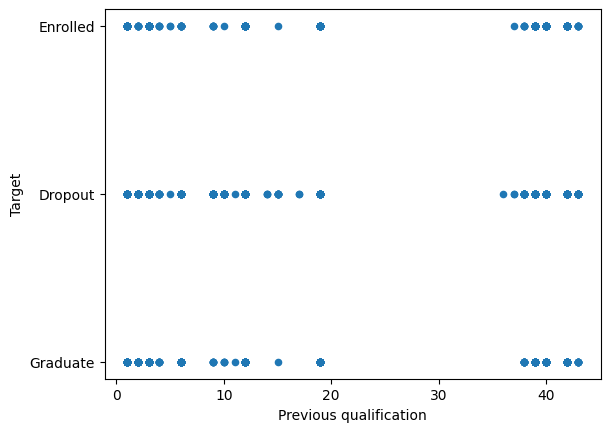

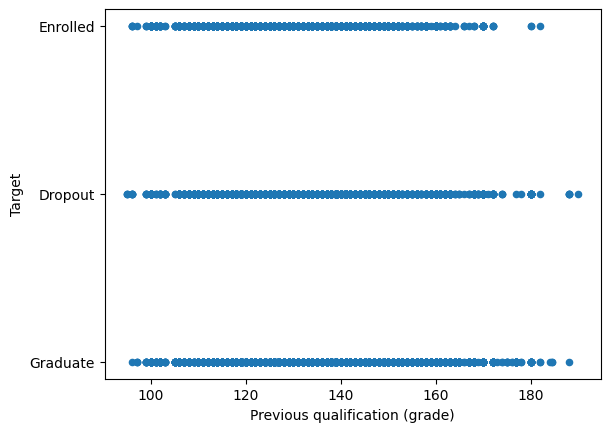

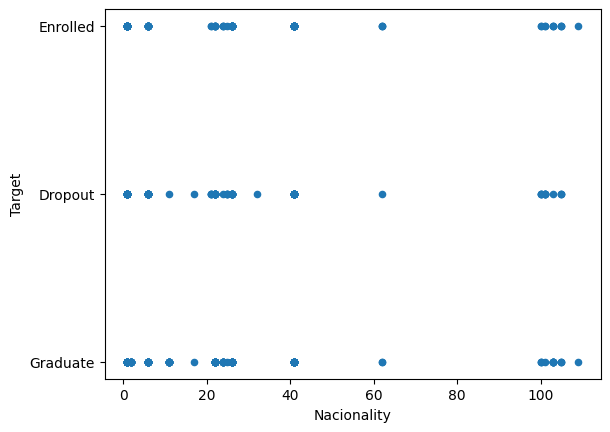

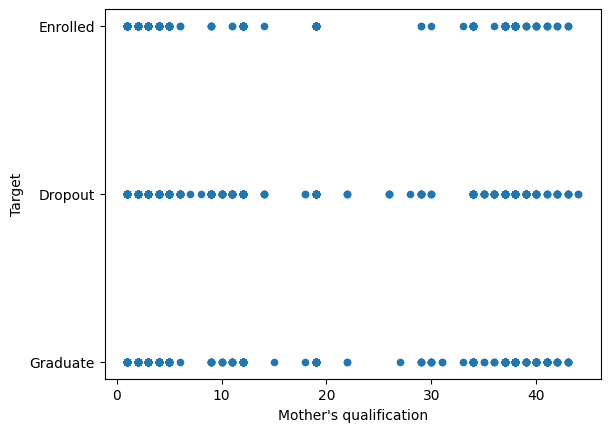

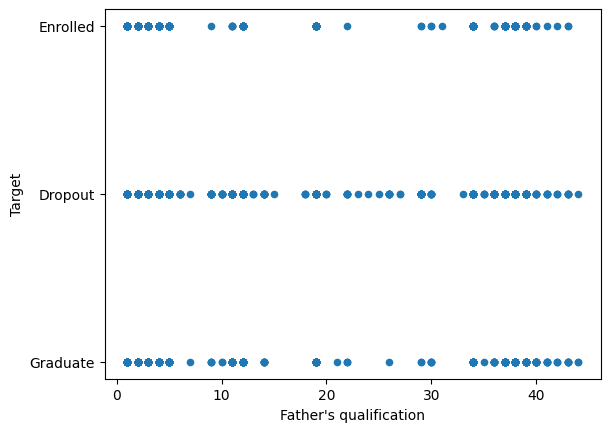

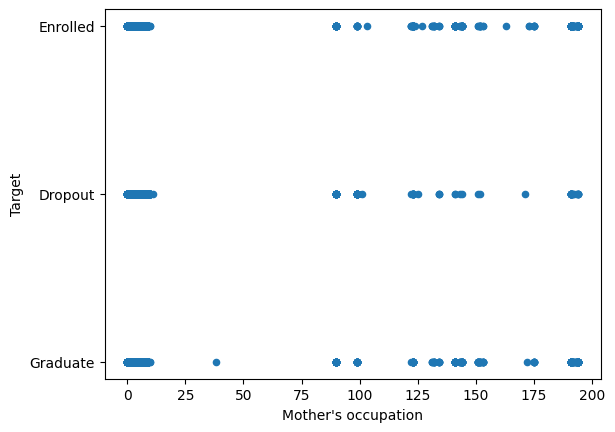

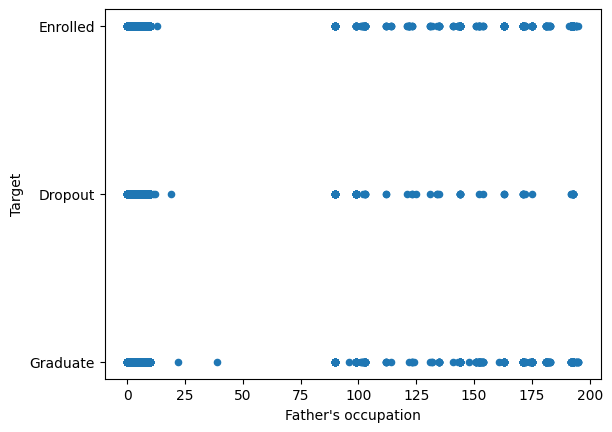

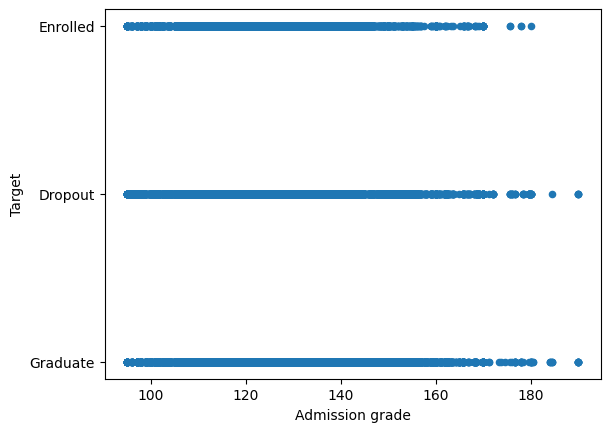

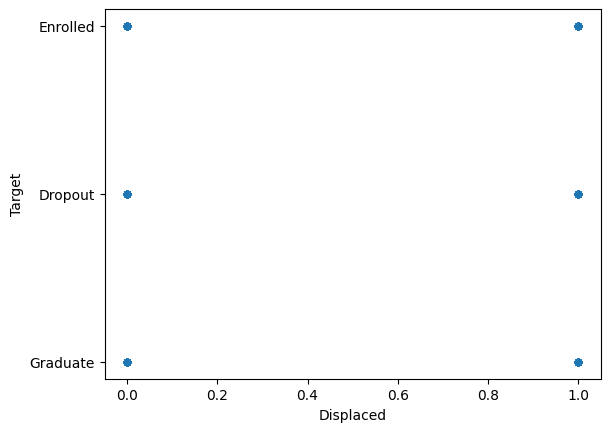

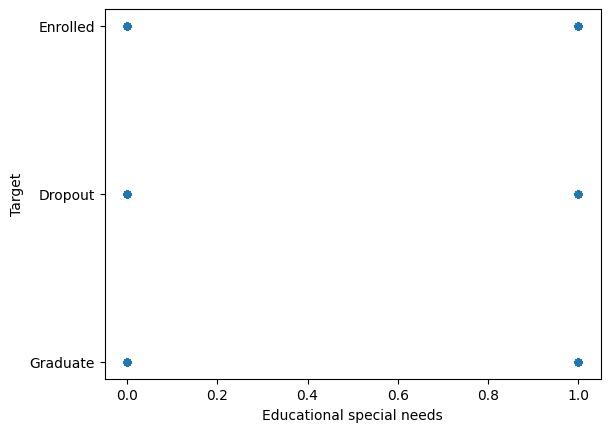

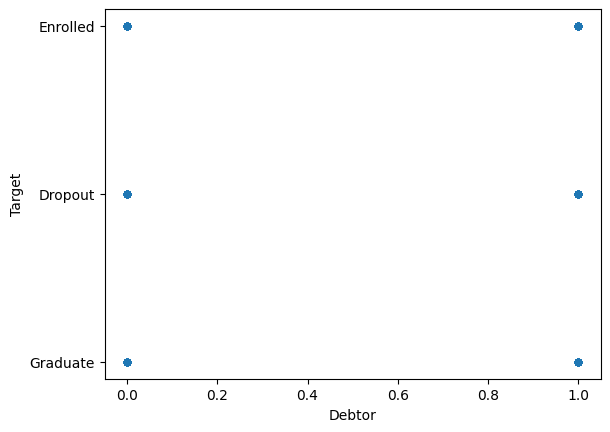

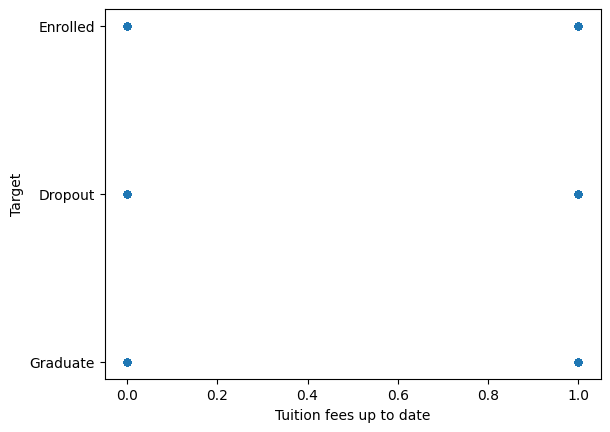

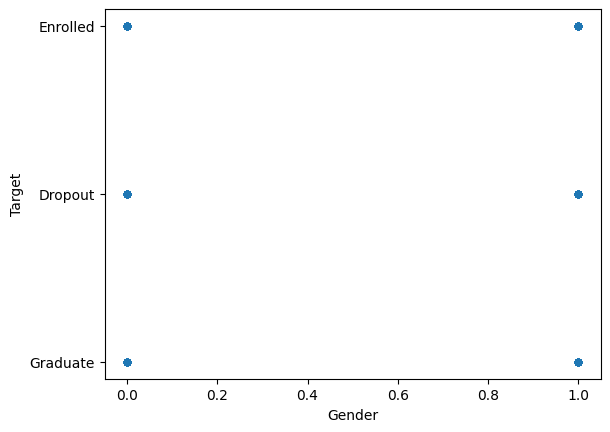

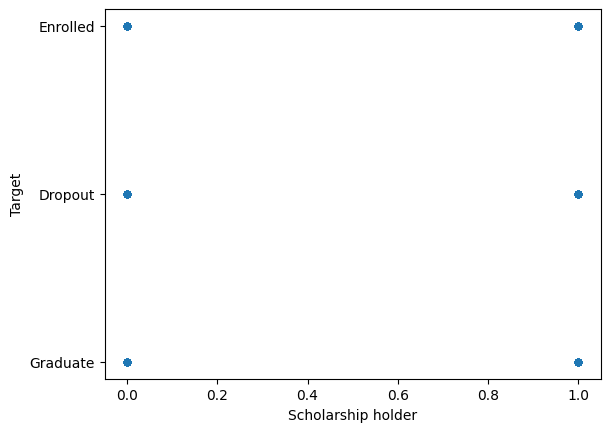

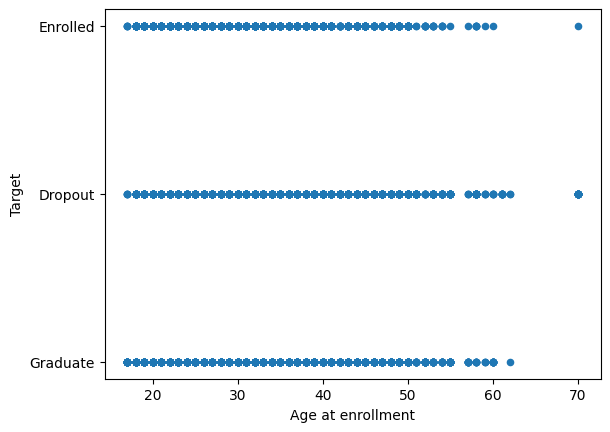

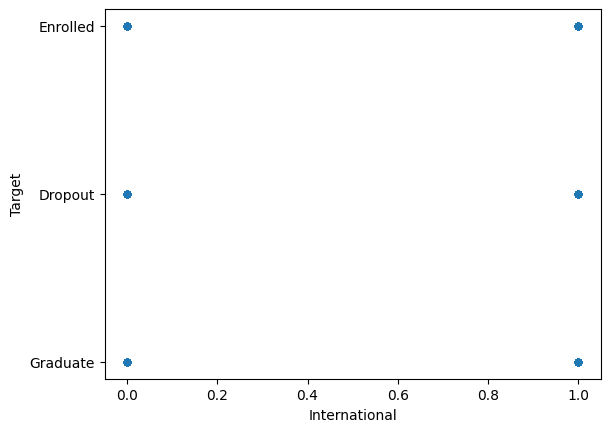

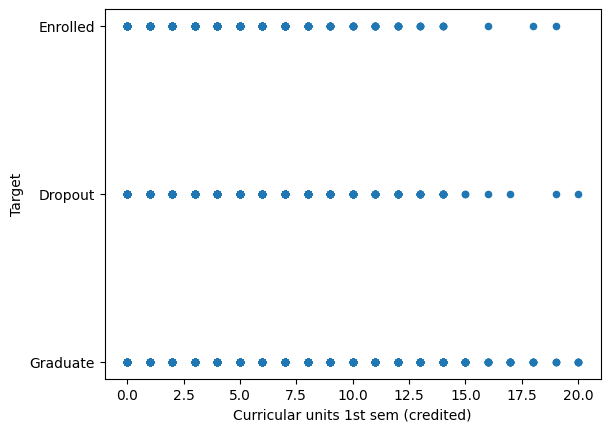

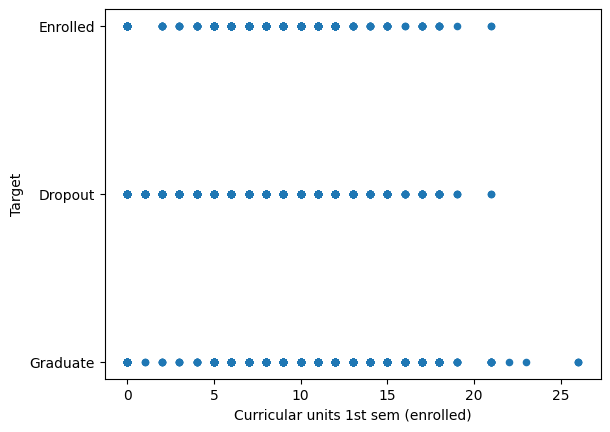

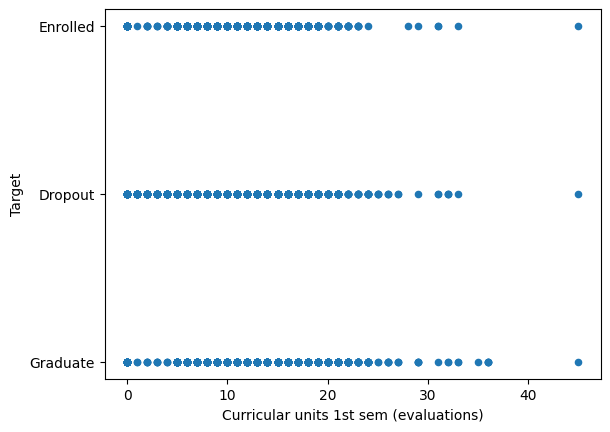

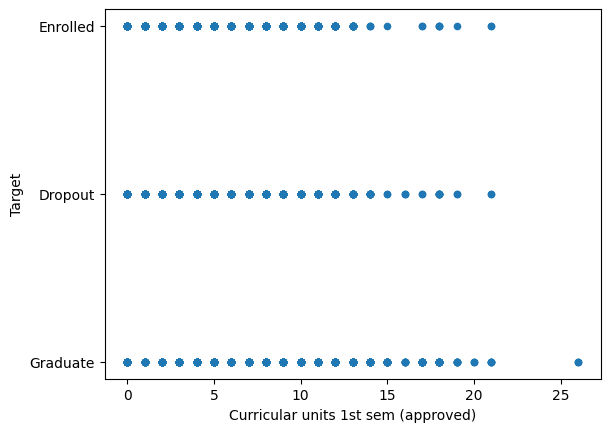

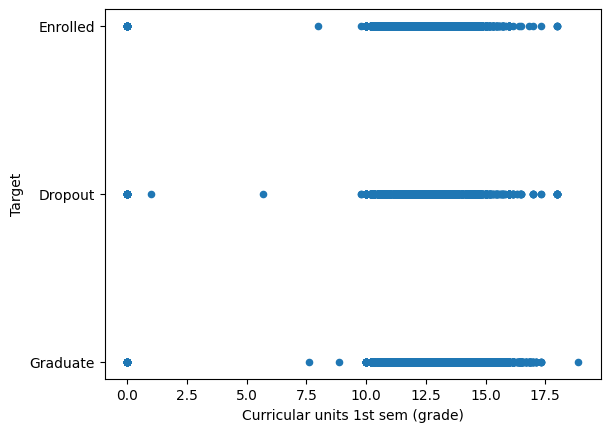

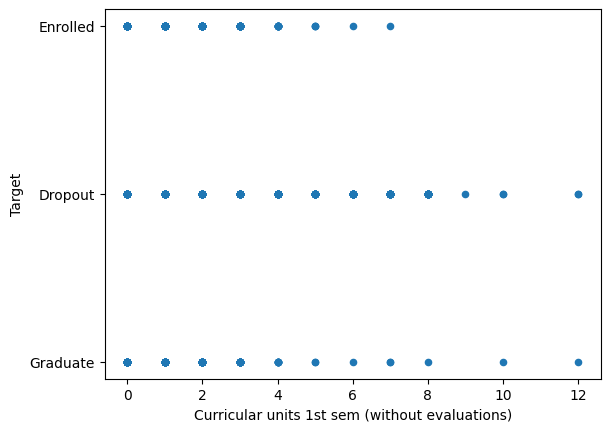

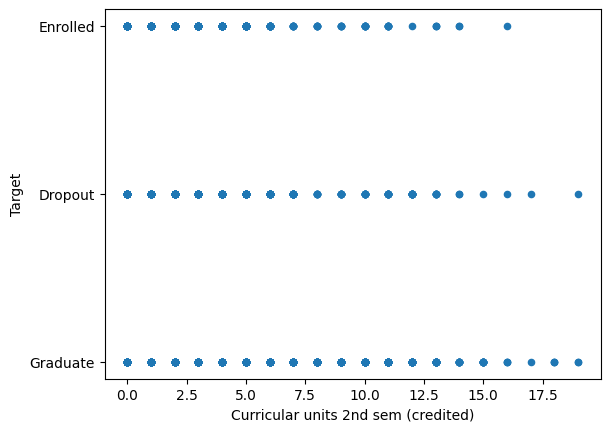

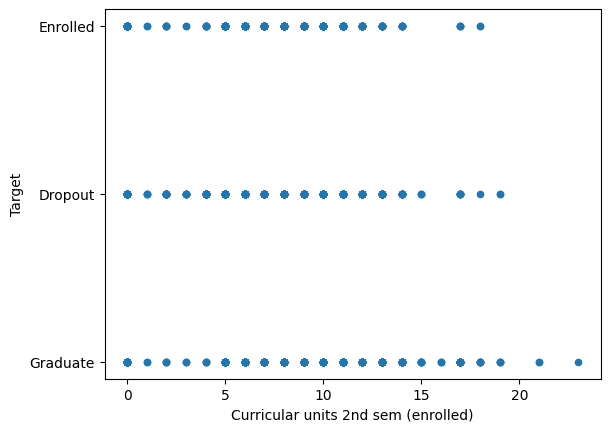

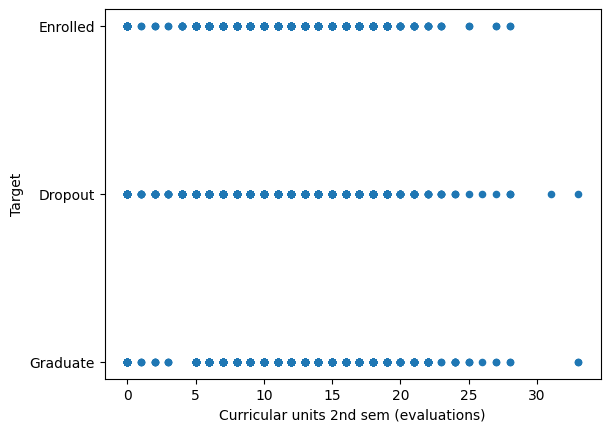

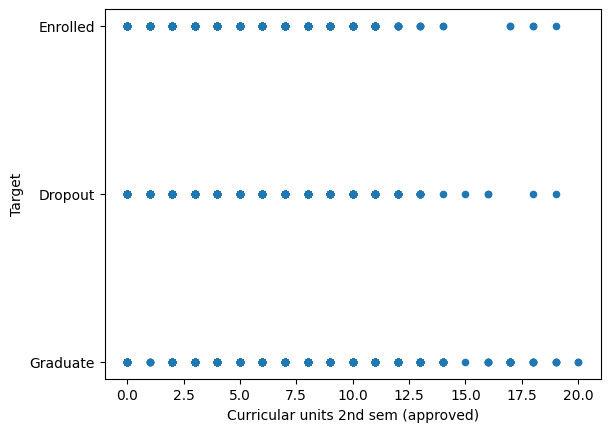

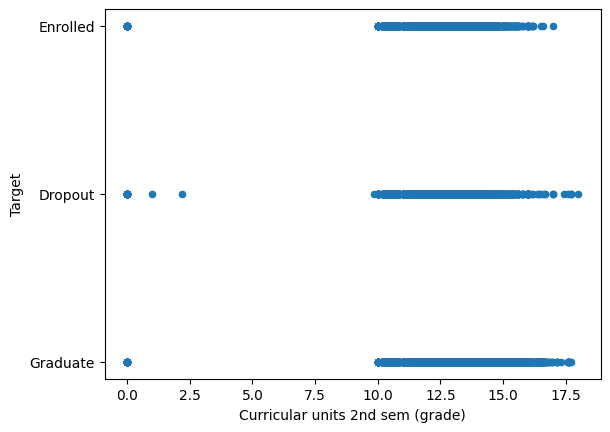

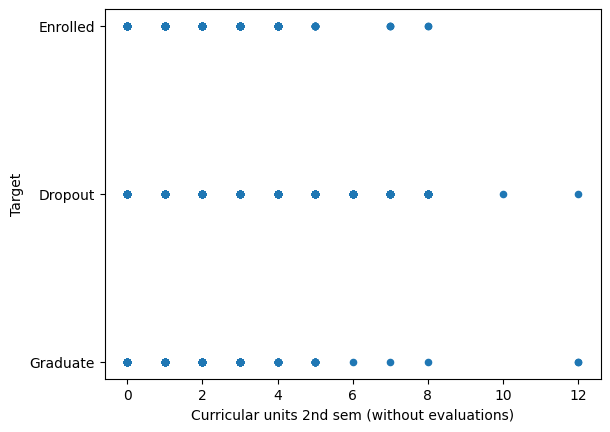

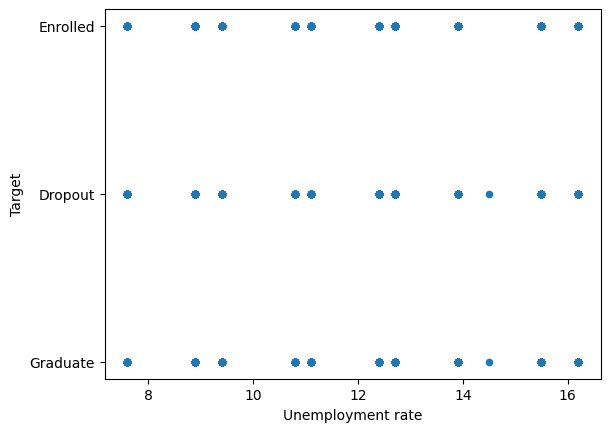

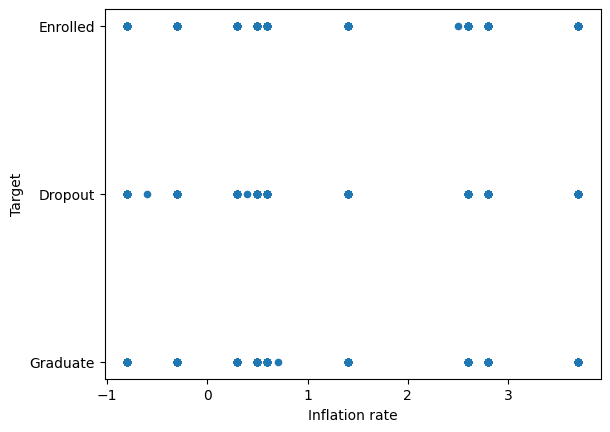

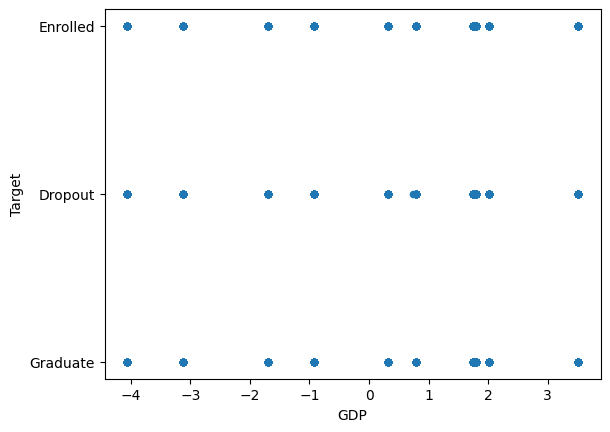

In [88]:
labels = ["id","Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Previous qualification (grade)","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Admission grade","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP"]

for label in labels:
    df.plot.scatter(x=label, y="Target")
    print("\n")

In [89]:
# df.drop(["id", "Inflation rate", "GDP", "Unemployment rate"], inplace=True, axis=1)

# Label encode the categorical data

In [90]:
le = LabelEncoder()

df['Target'] = le.fit_transform(df['Target'])
df['Target'].unique()

array([2, 0, 1])

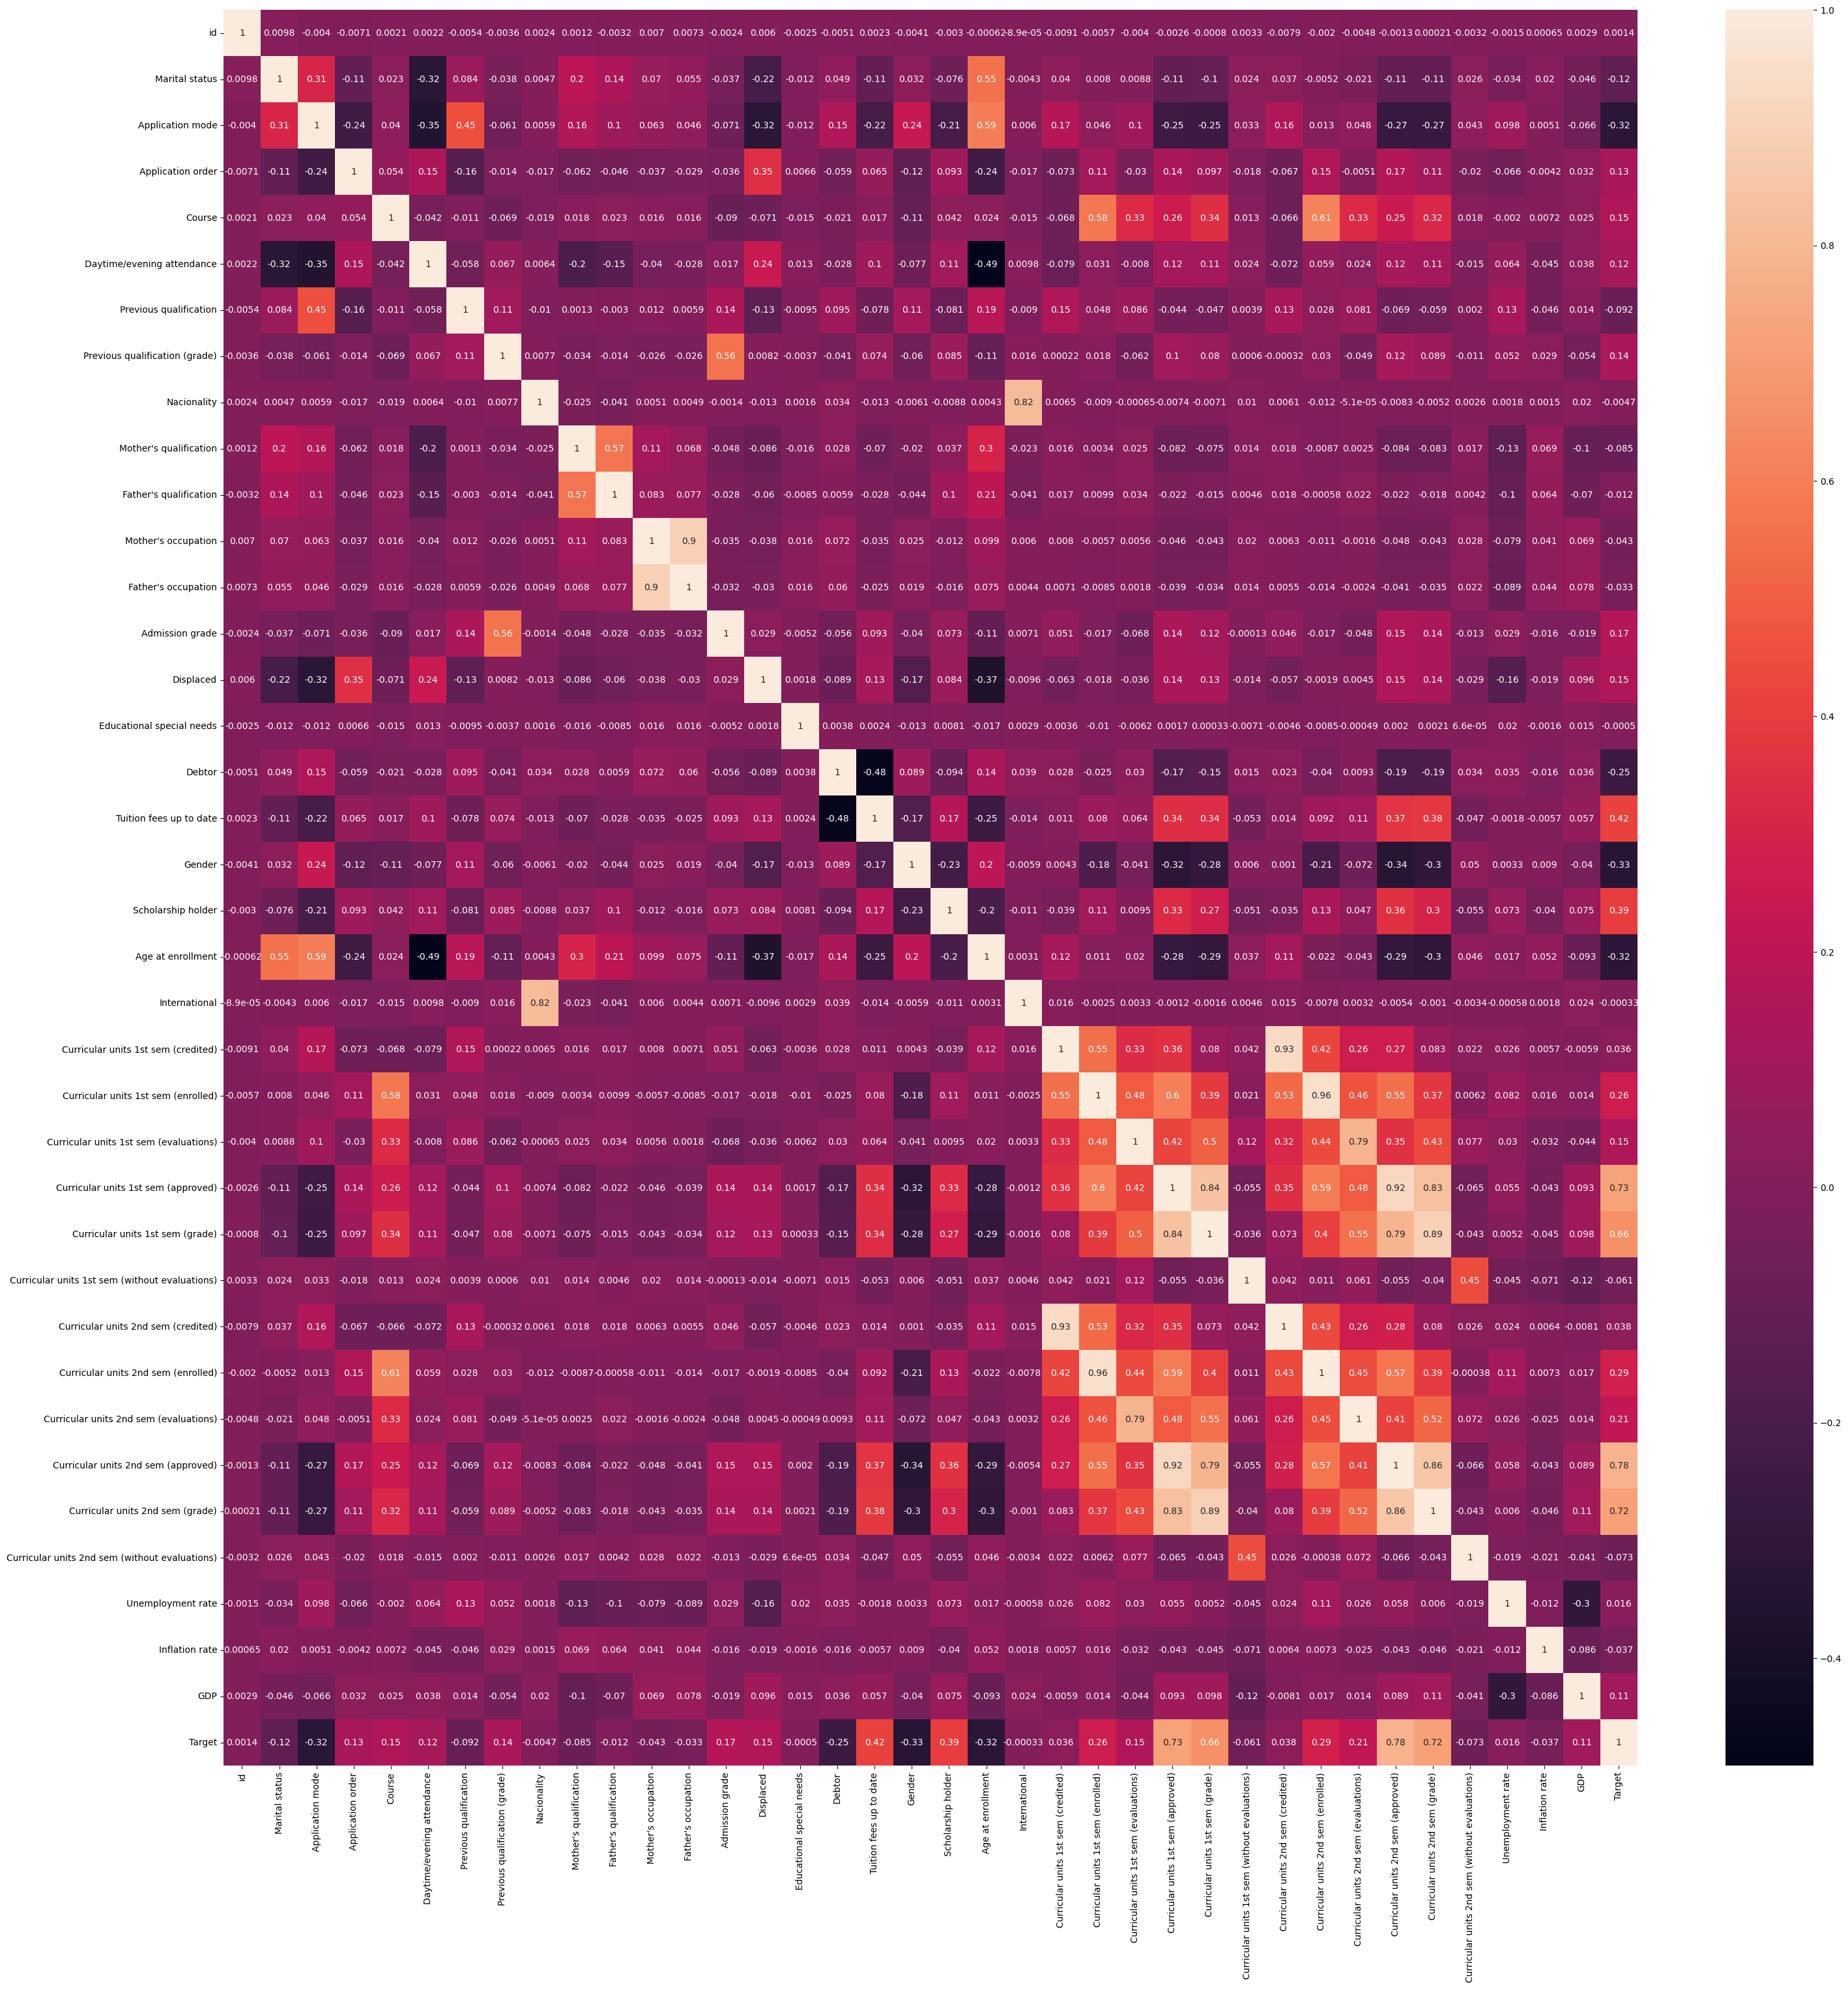

In [91]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Perform feature selection on the data

In [92]:
# Drop the columns that are not closely related to "Target" as indicated in the heatmap
df.drop(["id", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", 
         "Father's occupation", "Educational special needs", "International", "Curricular units 1st sem (credited)", 
         "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (grade)", 
         "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate"], axis=1, inplace=True)

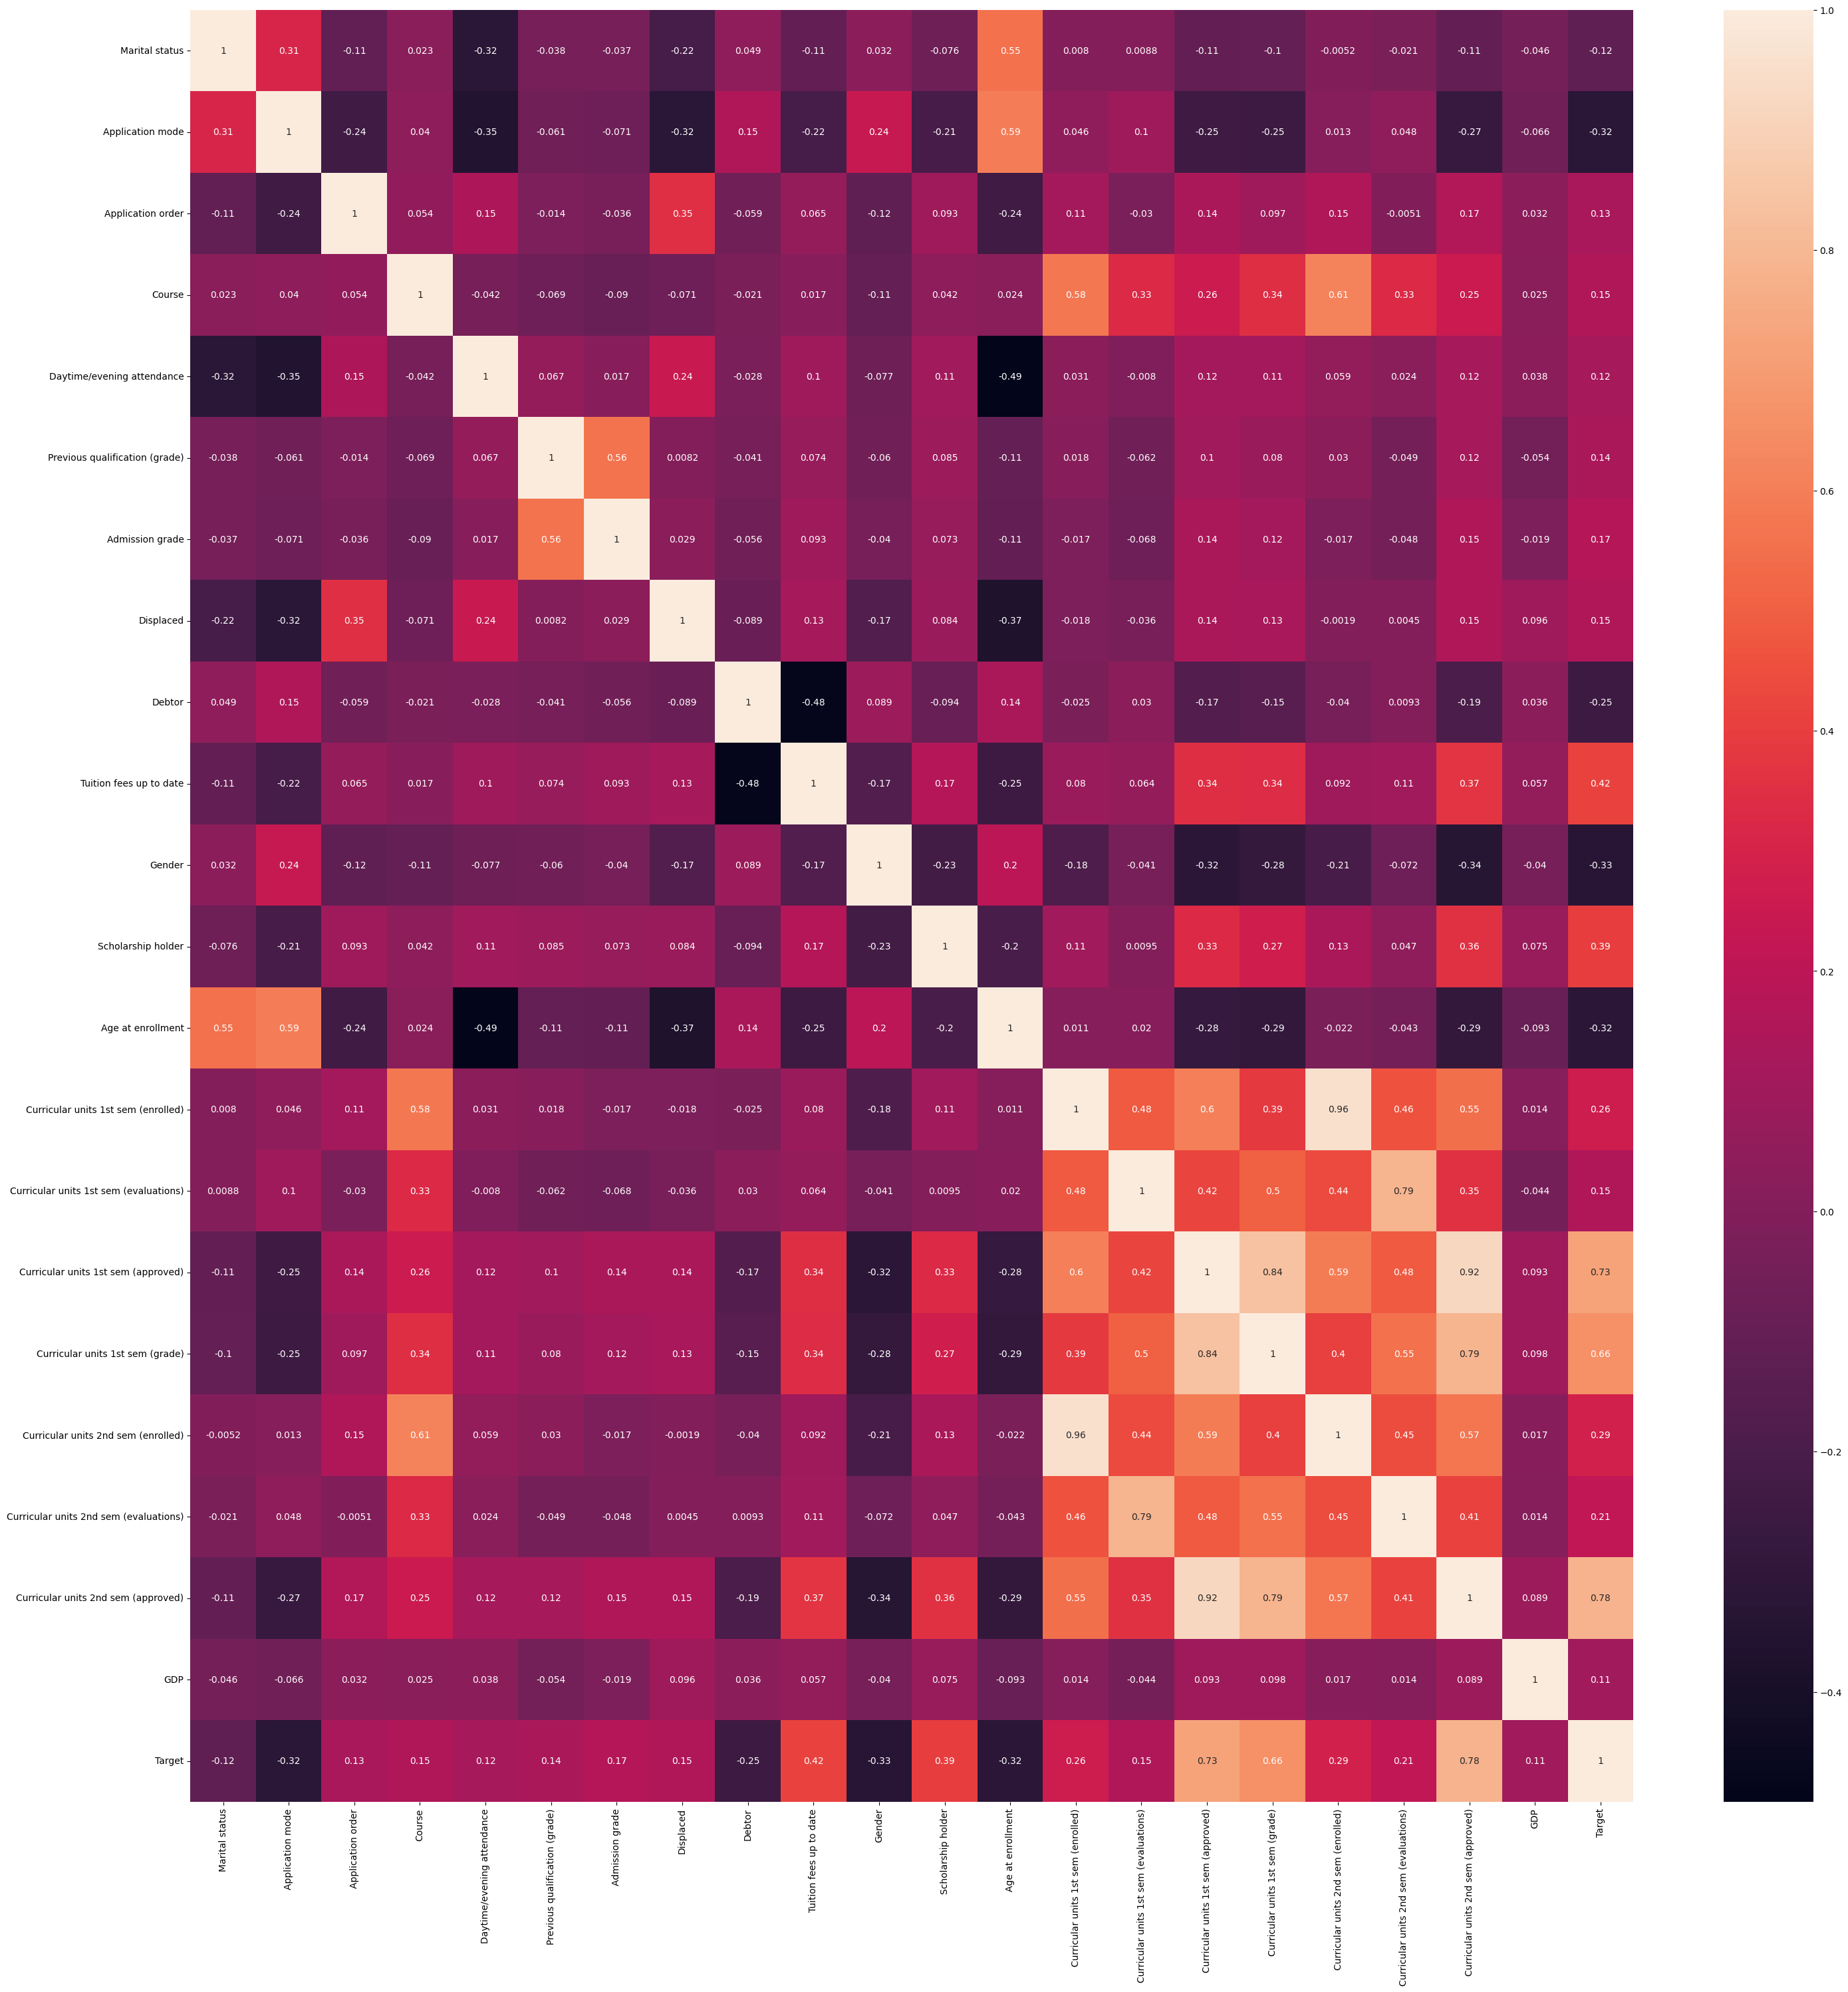

In [93]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [94]:
# Drop the columns that are closely related to each other (helps reduce training time)
df.drop(["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)"], axis=1, inplace=True)

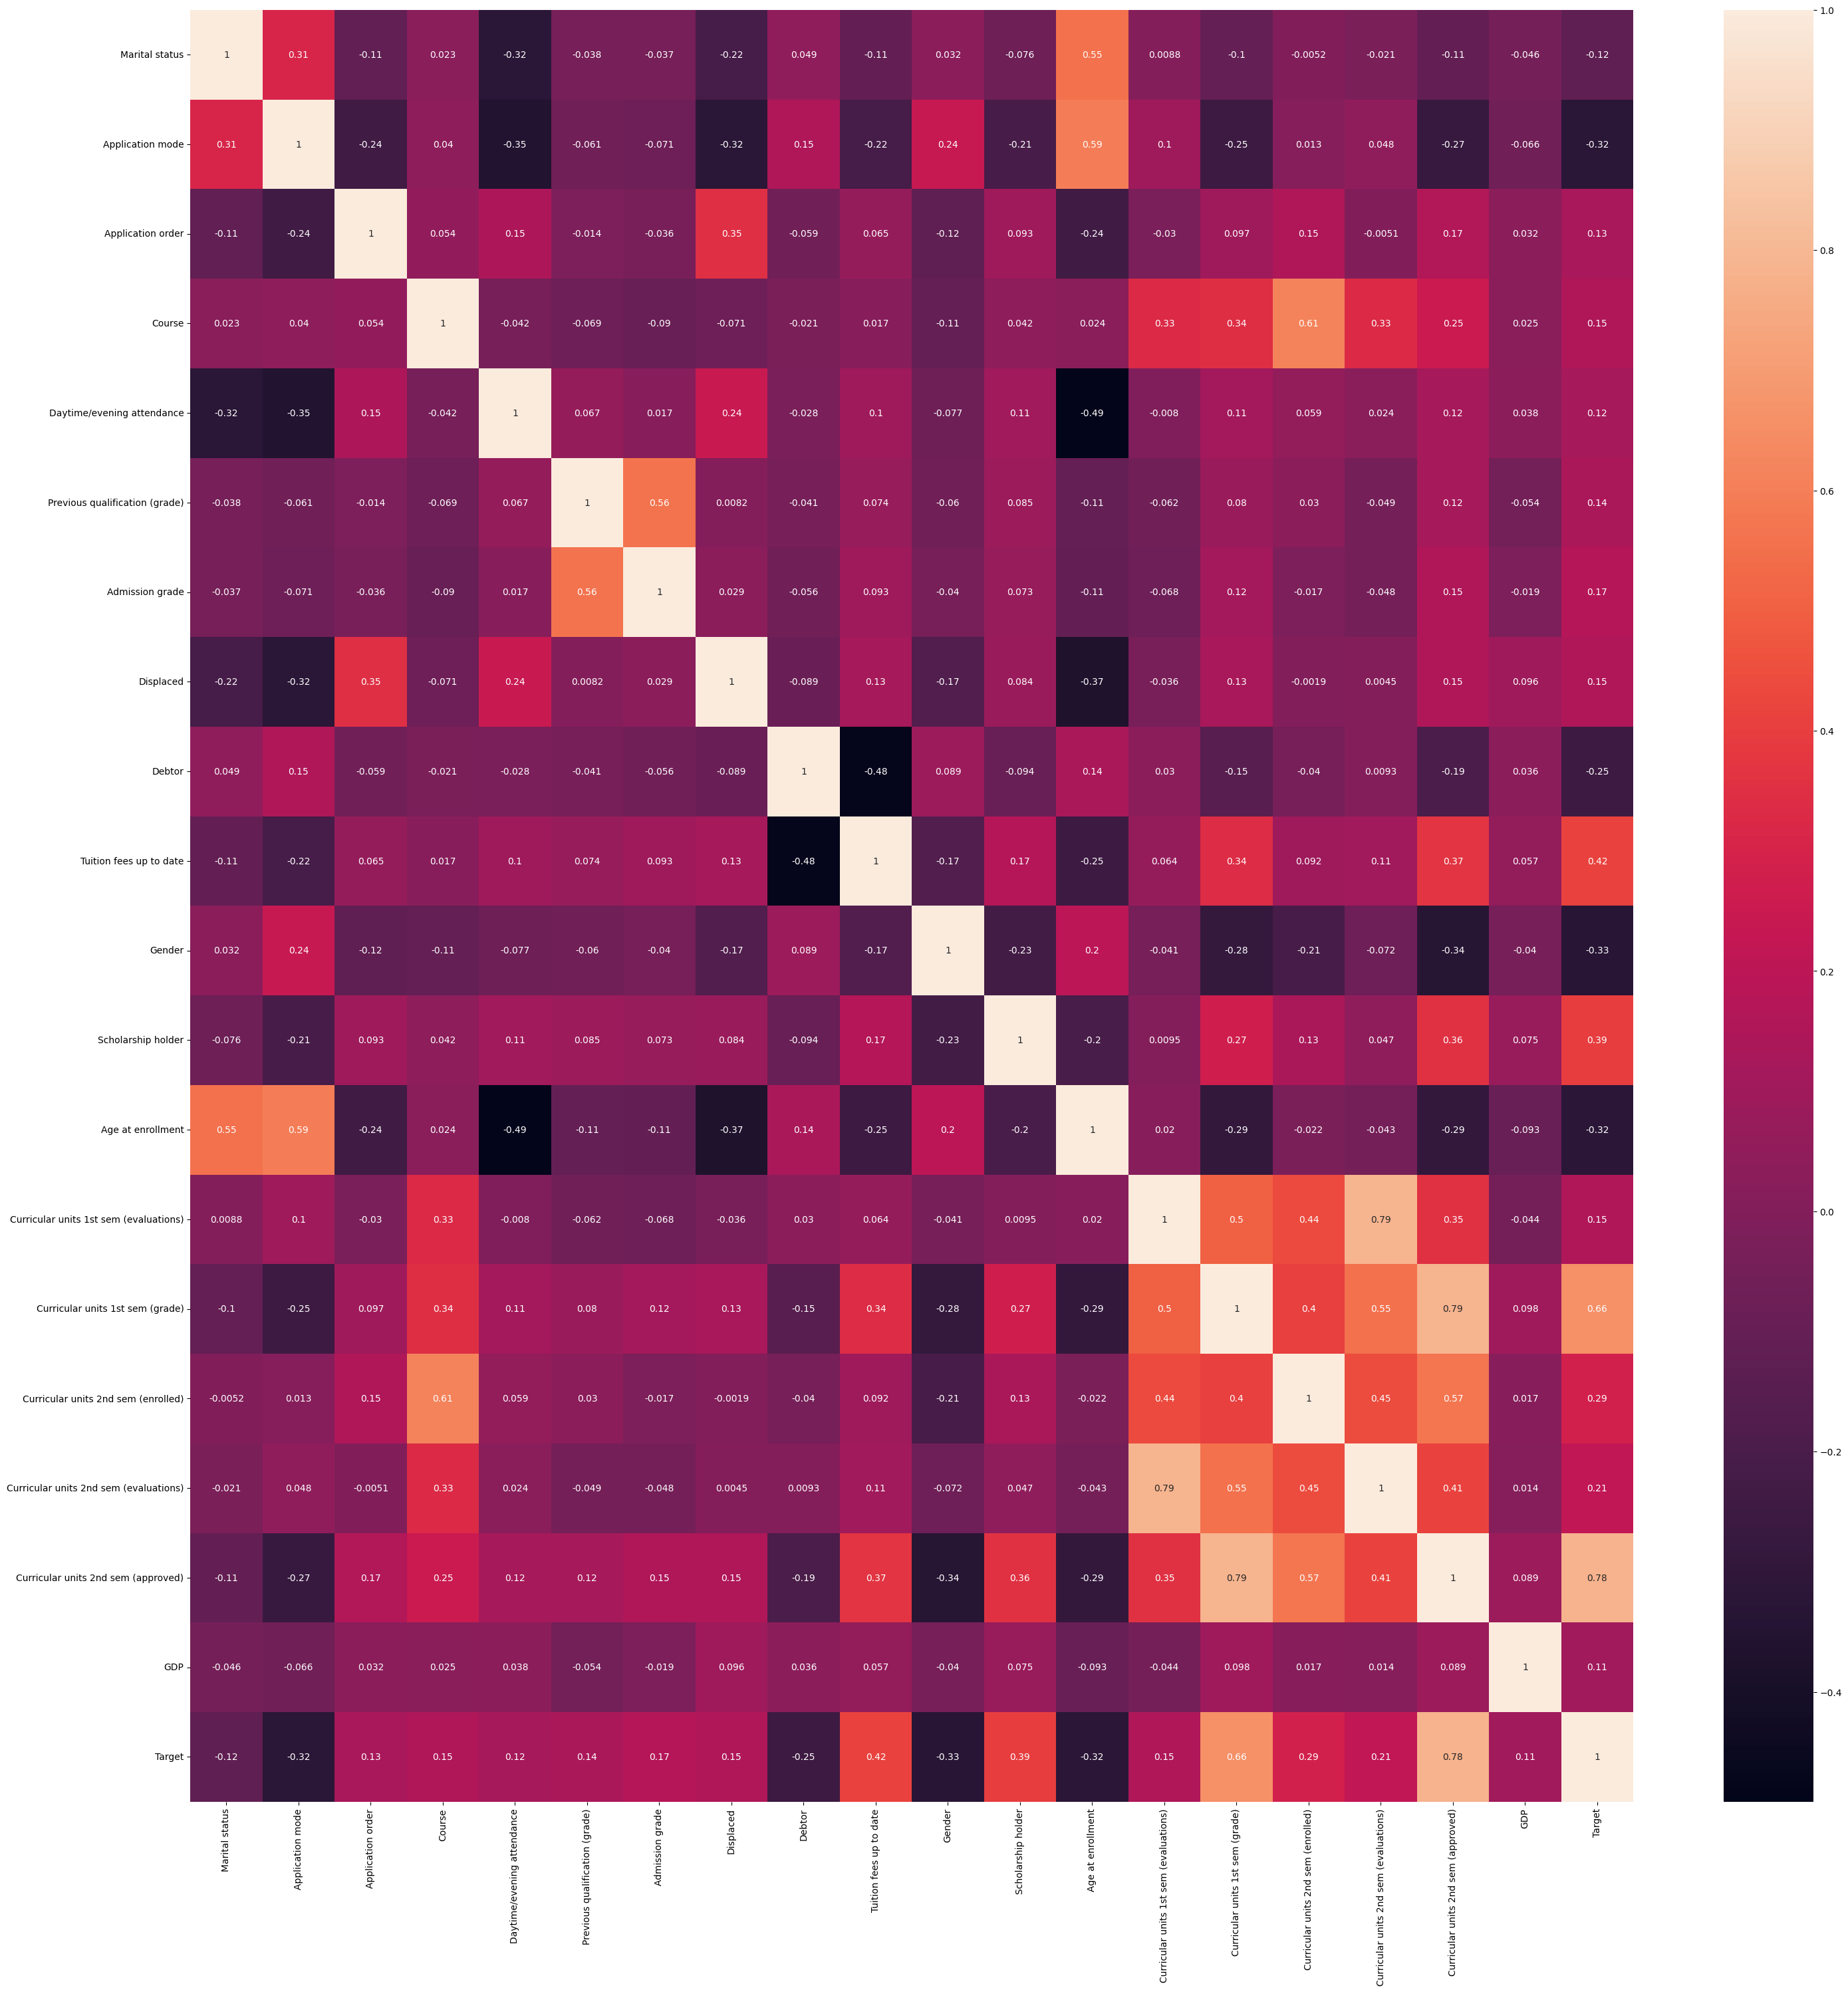

In [95]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Split the dataset

In [96]:
X = np.array(df.loc[:, df.columns != 'Target'])
y = np.array(df['Target'])

In [97]:
X.shape

(76518, 19)

In [98]:
y.shape

(76518,)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# Build the multi-layer perceptron model

In [100]:
model = keras.models.Sequential()

model.add(Input(shape=(19,)))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [101]:
# Add a early stopping check to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)

In [102]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4435 - loss: 16.4116 - val_accuracy: 0.6641 - val_loss: 0.8220
Epoch 2/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6107 - loss: 0.9225 - val_accuracy: 0.7373 - val_loss: 0.6586
Epoch 3/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4912 - loss: 1.0500 - val_accuracy: 0.4924 - val_loss: 1.0203
Epoch 4/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4961 - loss: 1.0303 - val_accuracy: 0.4920 - val_loss: 1.0219
Epoch 5/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4937 - loss: 1.0333 - val_accuracy: 0.4929 - val_loss: 1.0231
Epoch 6/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4982 - loss: 1.0333 - val_accuracy: 0.4929 - val_loss: 1.0275
Epoch 7/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4937 - loss: 1.0291 - val_accuracy: 0.4916 - val_loss: 1.0241
Epoch 8/100
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4971 - loss: 

# Evaluate the model

In [103]:
model.evaluate(X_test, y_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7336 - loss: 0.6640


[0.6693573594093323, 0.7336643934249878]